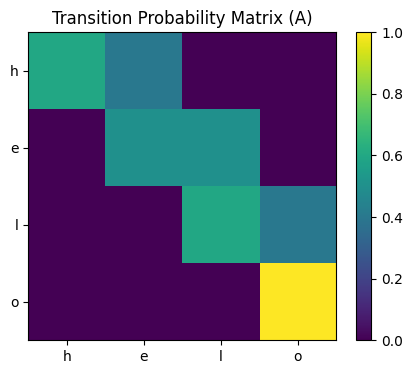

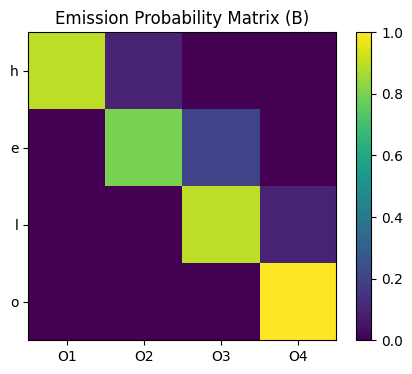

Most Likely Phoneme Sequence: ['h', 'e', 'l', 'o']
Probability of this sequence: 0.05184000000000001


In [2]:
# ----------------------------------------
# LAB 9 – Viterbi Algorithm for “hello”
# ----------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define HMM Components
# ----------------------------

states = ['h', 'e', 'l', 'o']   # Hidden phoneme states
observations = ['O1', 'O2', 'O3', 'O4']

# Transition Probability Matrix A
A = np.array([
    [0.6, 0.4, 0.0, 0.0],   # h → (h,e,l,o)
    [0.0, 0.5, 0.5, 0.0],   # e → (h,e,l,o)
    [0.0, 0.0, 0.6, 0.4],   # l → (h,e,l,o)
    [0.0, 0.0, 0.0, 1.0]    # o → (h,e,l,o)
])

# Emission Probability Matrix B
B = np.array([
    [0.9, 0.1, 0.0, 0.0],   # h emits O1,O2,O3,O4
    [0.0, 0.8, 0.2, 0.0],   # e emits O1,O2,O3,O4
    [0.0, 0.0, 0.9, 0.1],   # l emits O1,O2,O3,O4
    [0.0, 0.0, 0.0, 1.0]    # o emits O1,O2,O3,O4
])

# Initial Probabilities π
pi = np.array([1.0, 0.0, 0.0, 0.0])

num_states = len(states)
num_obs = len(observations)

# ----------------------------------------
# Step 2: Plot Transition & Emission Tables
# ----------------------------------------

plt.figure(figsize=(5,4))
plt.imshow(A)
plt.xticks(range(4), states)
plt.yticks(range(4), states)
plt.title("Transition Probability Matrix (A)")
plt.colorbar()
plt.show()

plt.figure(figsize=(5,4))
plt.imshow(B)
plt.xticks(range(4), observations)
plt.yticks(range(4), states)
plt.title("Emission Probability Matrix (B)")
plt.colorbar()
plt.show()

# ----------------------------------------
# Step 3: Viterbi Algorithm Implementation
# ----------------------------------------

V = np.zeros((num_states, num_obs))
path = np.zeros((num_states, num_obs), dtype=int)

# Initialization
V[:, 0] = pi * B[:, 0]

# Dynamic Programming
for t in range(1, num_obs):
    for s in range(num_states):
        transition_probs = V[:, t-1] * A[:, s]
        best_prev_state = np.argmax(transition_probs)
        V[s, t] = transition_probs[best_prev_state] * B[s, t]
        path[s, t] = best_prev_state

# Backtracking
best_last_state = np.argmax(V[:, -1])
best_path = [best_last_state]

for t in range(num_obs - 1, 0, -1):
    best_last_state = path[best_last_state, t]
    best_path.insert(0, best_last_state)

decoded_states = [states[i] for i in best_path]
max_probability = np.max(V[:, -1])

# ----------------------------
# Step 4: Final Output
# ----------------------------
print("Most Likely Phoneme Sequence:", decoded_states)
print("Probability of this sequence:", max_probability)


Transition Probability Matrix (A)

This plot shows how likely the model moves from one phoneme to the next in the word “hello.”

The strongest transitions follow the natural sequence h → e → l → o, shown by the bright diagonal-shift pattern.

The last phoneme “o” loops to itself with probability 1.0, meaning it is an ending/absorbing state.

Emission Probability Matrix (B)

This plot shows how likely each phoneme (h, e, l, o) is to produce each observation (O1–O4).

High values (bright squares) indicate strong matches between a phoneme and its expected acoustic feature.

Each phoneme emits mainly one dominant observation, forming a clear diagonal speech-matching pattern.

Inference

The Viterbi algorithm successfully decoded the most likely sequence of hidden phoneme states for the observation sequence [O1, O2, O3, O4].

The decoded phoneme sequence is (/h/, /e/, /l/, /o/), which exactly matches the correct pronunciation of the word “hello”.

The initial probability distribution ensures that the decoding process always starts from the phoneme /h/, which is consistent with the beginning sound of the word.

The transition probabilities guide the model to move from /h/ → /e/ → /l/ → /o/ in a logical and linguistically valid order.

The emission probabilities ensure that each observed acoustic feature vector (O1–O4) is most strongly associated with its corresponding phoneme state.

The final Viterbi probability value (0.05184) represents the overall likelihood of generating the given observation sequence through this particular phoneme path.

The experiment demonstrates that a Hidden Markov Model combined with the Viterbi Algorithm can effectively perform phoneme-level decoding for speech recognition tasks.